In [3]:
import json


In [4]:
def load_json(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return data


In [5]:
base_path = '../../data/'

training_challenges = load_json(base_path + 'arc-agi_training_challenges.json')

In [6]:
%load_ext autoreload
%autoreload 2
from src.model.cell import *
from src.model.grid import *
from src.model.molecule import *
from src.model.challenge_pair import *

In [90]:
training  = training_challenges['007bbfb7']['train'][0]['input']
update_training = copy.deepcopy(training)
update_training [0][1] = 3
update_training [1][1] = 3
update_training [2][1] = 3
diamond = [[0,0,0,3,0,0,0],[0,0,3,0,3,0,0],[0,3,0,0,0,3,0],[3,0,0,5,0,0,3],[0,3,0,0,0,3,0],[0,0,3,0,3,0,0],[0,0,0,3,0,0,0]]

In [8]:
training

[[0, 7, 7], [7, 7, 7], [0, 7, 7]]

In [9]:
update_training

[[0, 3, 7], [7, 3, 7], [0, 3, 7]]

In [ ]:
g = Grid(training)
gu = Grid(update_training)

In [91]:

gd = Grid(diamond)

(7, 7)


In [92]:
gd.molecules

In [93]:
gd.molecules[0].matrix()

[[0, 0, 0, 3, 0, 0, 0],
 [0, 0, 3, 0, 3, 0, 0],
 [0, 3, 0, 0, 0, 3, 0],
 [3, 0, 0, 0, 0, 0, 3],
 [0, 3, 0, 0, 0, 3, 0],
 [0, 0, 3, 0, 3, 0, 0],
 [0, 0, 0, 3, 0, 0, 0]]

In [94]:
gd.molecules[1].matrix()

[[5]]

In [10]:
c1 = Cell(g, 0, 0, 7)
c2 = Cell(g, 0, 1, 7)
c3 = Cell(g, 0, 2, 7)
c4 = Cell(g, 1, 0, 7)
c5 = Cell(g, 1, 1, 7)
c6 = Cell(g, 1, 2, 7)
c7 = Cell(g, 2, 0, 7)
c8 = Cell(g, 2, 1, 7)
c9 = Cell(g, 2, 2, 7)
c10 = Cell(g, 2, 2, 8)

In [11]:
mol = Molecule([c1, c2, c3, c4, c6, c7, c8, c9])
mol2 = Molecule([c1, c2])
mol3 = Molecule([c1, c2, c3, c4, c5, c6, c7, c8, c9])
mol4 = Molecule([c1, c2, c3, c4, c5, c6, c7, c8, c10])

In [12]:
mol.molecule_linked_list

[[<src.model.cell.Cell at 0x25dbb14dc00>,

In [13]:
mol.is_sub_of(mol)

True

In [14]:
mol.is_sub_of(mol2)

False

In [15]:
mol2.is_sub_of(mol)


True

In [16]:
mol.is_filled()

False

In [17]:
mol3.is_filled()

True

In [18]:
mol3.is_same_color()

True

In [19]:
mol4.is_same_color()

False

In [20]:
c2.get_neighbor(1,2)

In [28]:
[str(cell.uuid) for cell in c2.get_neighbors()]

['1ceb8eeb-9f05-4f18-ac02-3e6c53aa728d',
 '99d1bc89-91cb-424a-836f-22541efcc678',
 'c7ba2c72-920b-486d-ae51-e4ba79fcbdf4',
 'c90687f6-85d2-44f4-be94-4b6224d6da48',
 '5dfb50a2-7f81-48c2-a081-bb28c75ccd5a',
 'a2daae68-248d-4f36-9e43-9760827c1fb8']

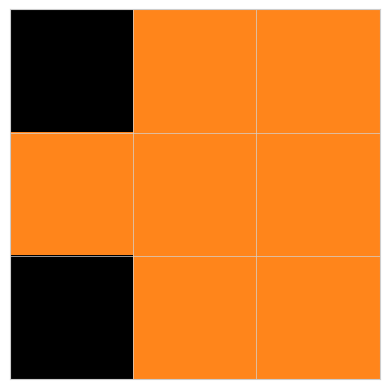

In [22]:
g.show()

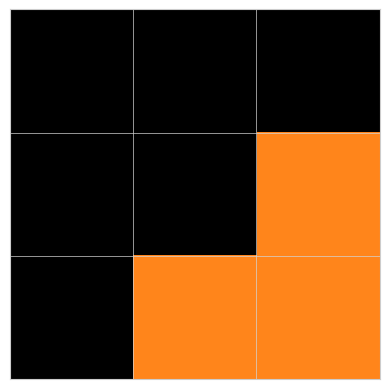

In [23]:
g2 = Grid(c1.get_neighbors_matrix())
g2.show()

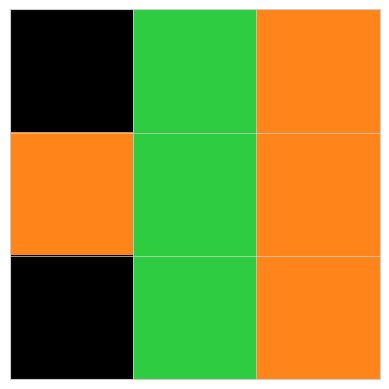

In [24]:
gu.show()

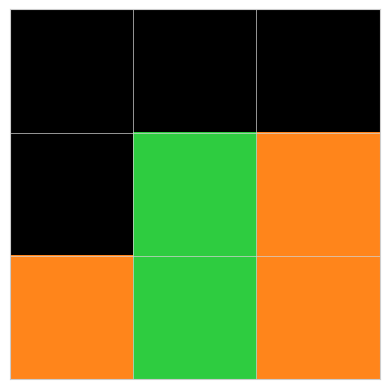

In [25]:
g3 = Grid(gu.get_cell(0,1).get_neighbors_matrix())
g3.show()

In [46]:
gu.get_cell(0,1).get_color_neighbors()

In [49]:
gu.get_cell(1, 1).get_color_neighbors_matrix()

[[3, 0, 0], [3, 0, 0], [0, 0, 0]]

(3, 3)
(3, 3)


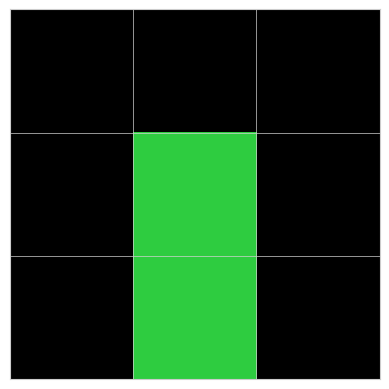

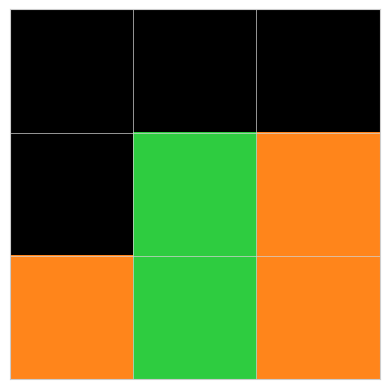

In [51]:
Grid(gu.get_cell(0, 1).get_color_neighbors_matrix()).show()
Grid(gu.get_cell(0, 1).get_neighbors_matrix(2)).show()

In [ ]:
Grid(gu.get_cell(0, 2).get_color_neighbors_matrix()).show()
Grid(gu.get_cell(0, 2).get_neighbors_matrix()).show()

In [45]:
Grid(gu.get_cell(1, 1).get_color_neighbors_matrix()).show()
Grid(gu.get_cell(1, 1).get_neighbors_matrix()).show()

(1, 3)


IndexError: list index out of range

In [ ]:
Grid(mol.matrix()).show()

In [ ]:
gd.show()

In [96]:
gd.molecules[0].matrix()

[[0, 0, 0, 3, 0, 0, 0],
 [0, 0, 3, 0, 3, 0, 0],
 [0, 3, 0, 0, 0, 3, 0],
 [3, 0, 0, 0, 0, 0, 3],
 [0, 3, 0, 0, 0, 3, 0],
 [0, 0, 3, 0, 3, 0, 0],
 [0, 0, 0, 3, 0, 0, 0]]

(7, 7)
(1, 1)


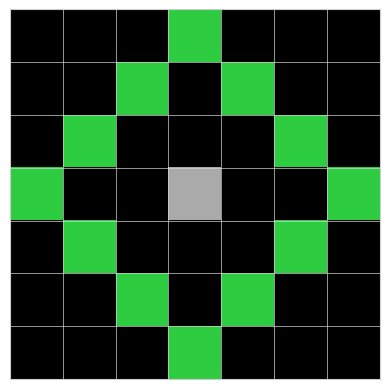

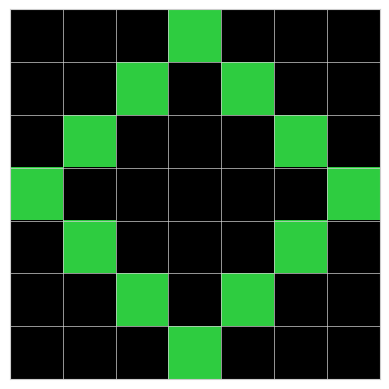

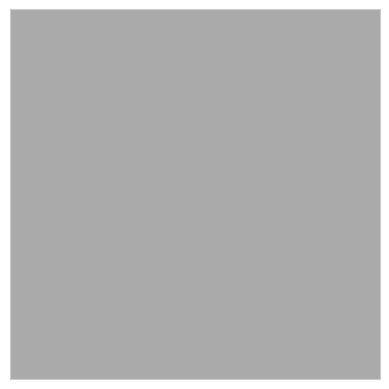

In [95]:
gd.show()
Grid(gd.molecules[0].matrix()).show()
Grid(gd.molecules[1].matrix()).show()

(7, 7)


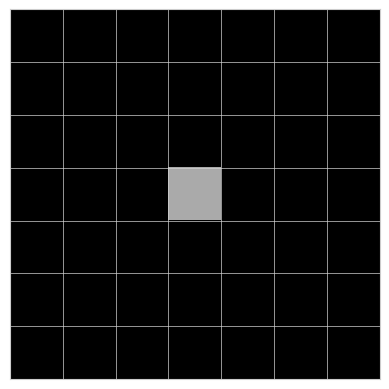

In [97]:
Grid(gd.get_cell(3, 3).get_color_neighbors_matrix(3)).show()

(9, 9)


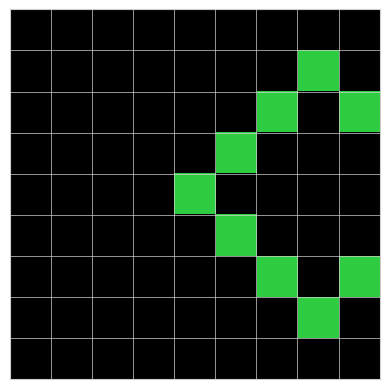

In [99]:
Grid(gd.get_cell(3, 0).get_color_neighbors_matrix(4)).show()